In [1]:
import sys
sys.path.append('/home/sga/Code/FAIRFluids')
from FAIRFluids.core.lib import FAIRFluidsDocument, Version, Citation
from FAIRFluids.core.functionalities import FAIRFluidsCMLParser

In [2]:

# Test the extended class
doc = FAIRFluidsDocument(
    version=Version(
        versionMajor=1,
        versionMinor=0
    )
)

# Add same data as example
doc.citation = Citation(Type="journal")
doc.citation.add_to_author(given_name="AAA", family_name="Doe")

# Add compounds and fluid data
doc.add_to_compound(
    compoundID="2",
    pubChemID=962,
    commonName="Water",
    name_IUPAC="oxidane", 
    standard_InChI="InChI=1S/H2O/h1H2",
    standard_InChI_key="XLYOFNOQVPJJNP-UHFFFAOYSA-N"
)

doc.add_to_compound(
    compoundID="1",
    pubChemID=1128,
    commonName="Glycerol",
    name_IUPAC="glycerol",
    standard_InChI="InChI=1S/C3H8O3/c1-2-3-4/h2-3H,1H3",
    standard_InChI_key="XLYOFNOQVPJJNP-UHFFFAOYSA-N"
)

parser = FAIRFluidsCMLParser("/home/sga/Code/FAIRFluids/FAIRFluids/data/cml_xml/xu/CML_exp_sim_pred.xml", document=doc)
doc = parser.parse()

print(doc.model_dump_json(indent=2))
# Save model to JSON file
with open('/home/sga/Code/FAIRFluids/FAIRFluids/fairfluids_model.json', 'w') as f:
    f.write(doc.model_dump_json(indent=2))

{
  "version": {
    "versionMajor": 1,
    "versionMinor": 0
  },
  "citation": {
    "litType": null,
    "author": [
      {
        "given_name": "AAA",
        "family_name": "Doe",
        "email": null,
        "orcid": null,
        "affiliation": null
      }
    ],
    "doi": null,
    "page": null,
    "pub_name": null,
    "title": null,
    "lit_volume_num": null,
    "url_citation": null,
    "publication_year": null
  },
  "compound": [
    {
      "compoundID": "2",
      "pubChemID": 962,
      "commonName": "Water",
      "SELFIE": null,
      "name_IUPAC": "oxidane",
      "standard_InChI": "InChI=1S/H2O/h1H2",
      "standard_InChI_key": "XLYOFNOQVPJJNP-UHFFFAOYSA-N"
    },
    {
      "compoundID": "1",
      "pubChemID": 1128,
      "commonName": "Glycerol",
      "SELFIE": null,
      "name_IUPAC": "glycerol",
      "standard_InChI": "InChI=1S/C3H8O3/c1-2-3-4/h2-3H,1H3",
      "standard_InChI_key": "XLYOFNOQVPJJNP-UHFFFAOYSA-N"
    }
  ],
  "fluid": [
    {
     

In [3]:
with open('/home/sga/Code/FAIRFluids/FAIRFluids/fairfluids_model.json', 'r') as f:
    json_data = f.read()
    
validated_doc = FAIRFluidsDocument.model_validate_json(json_data)

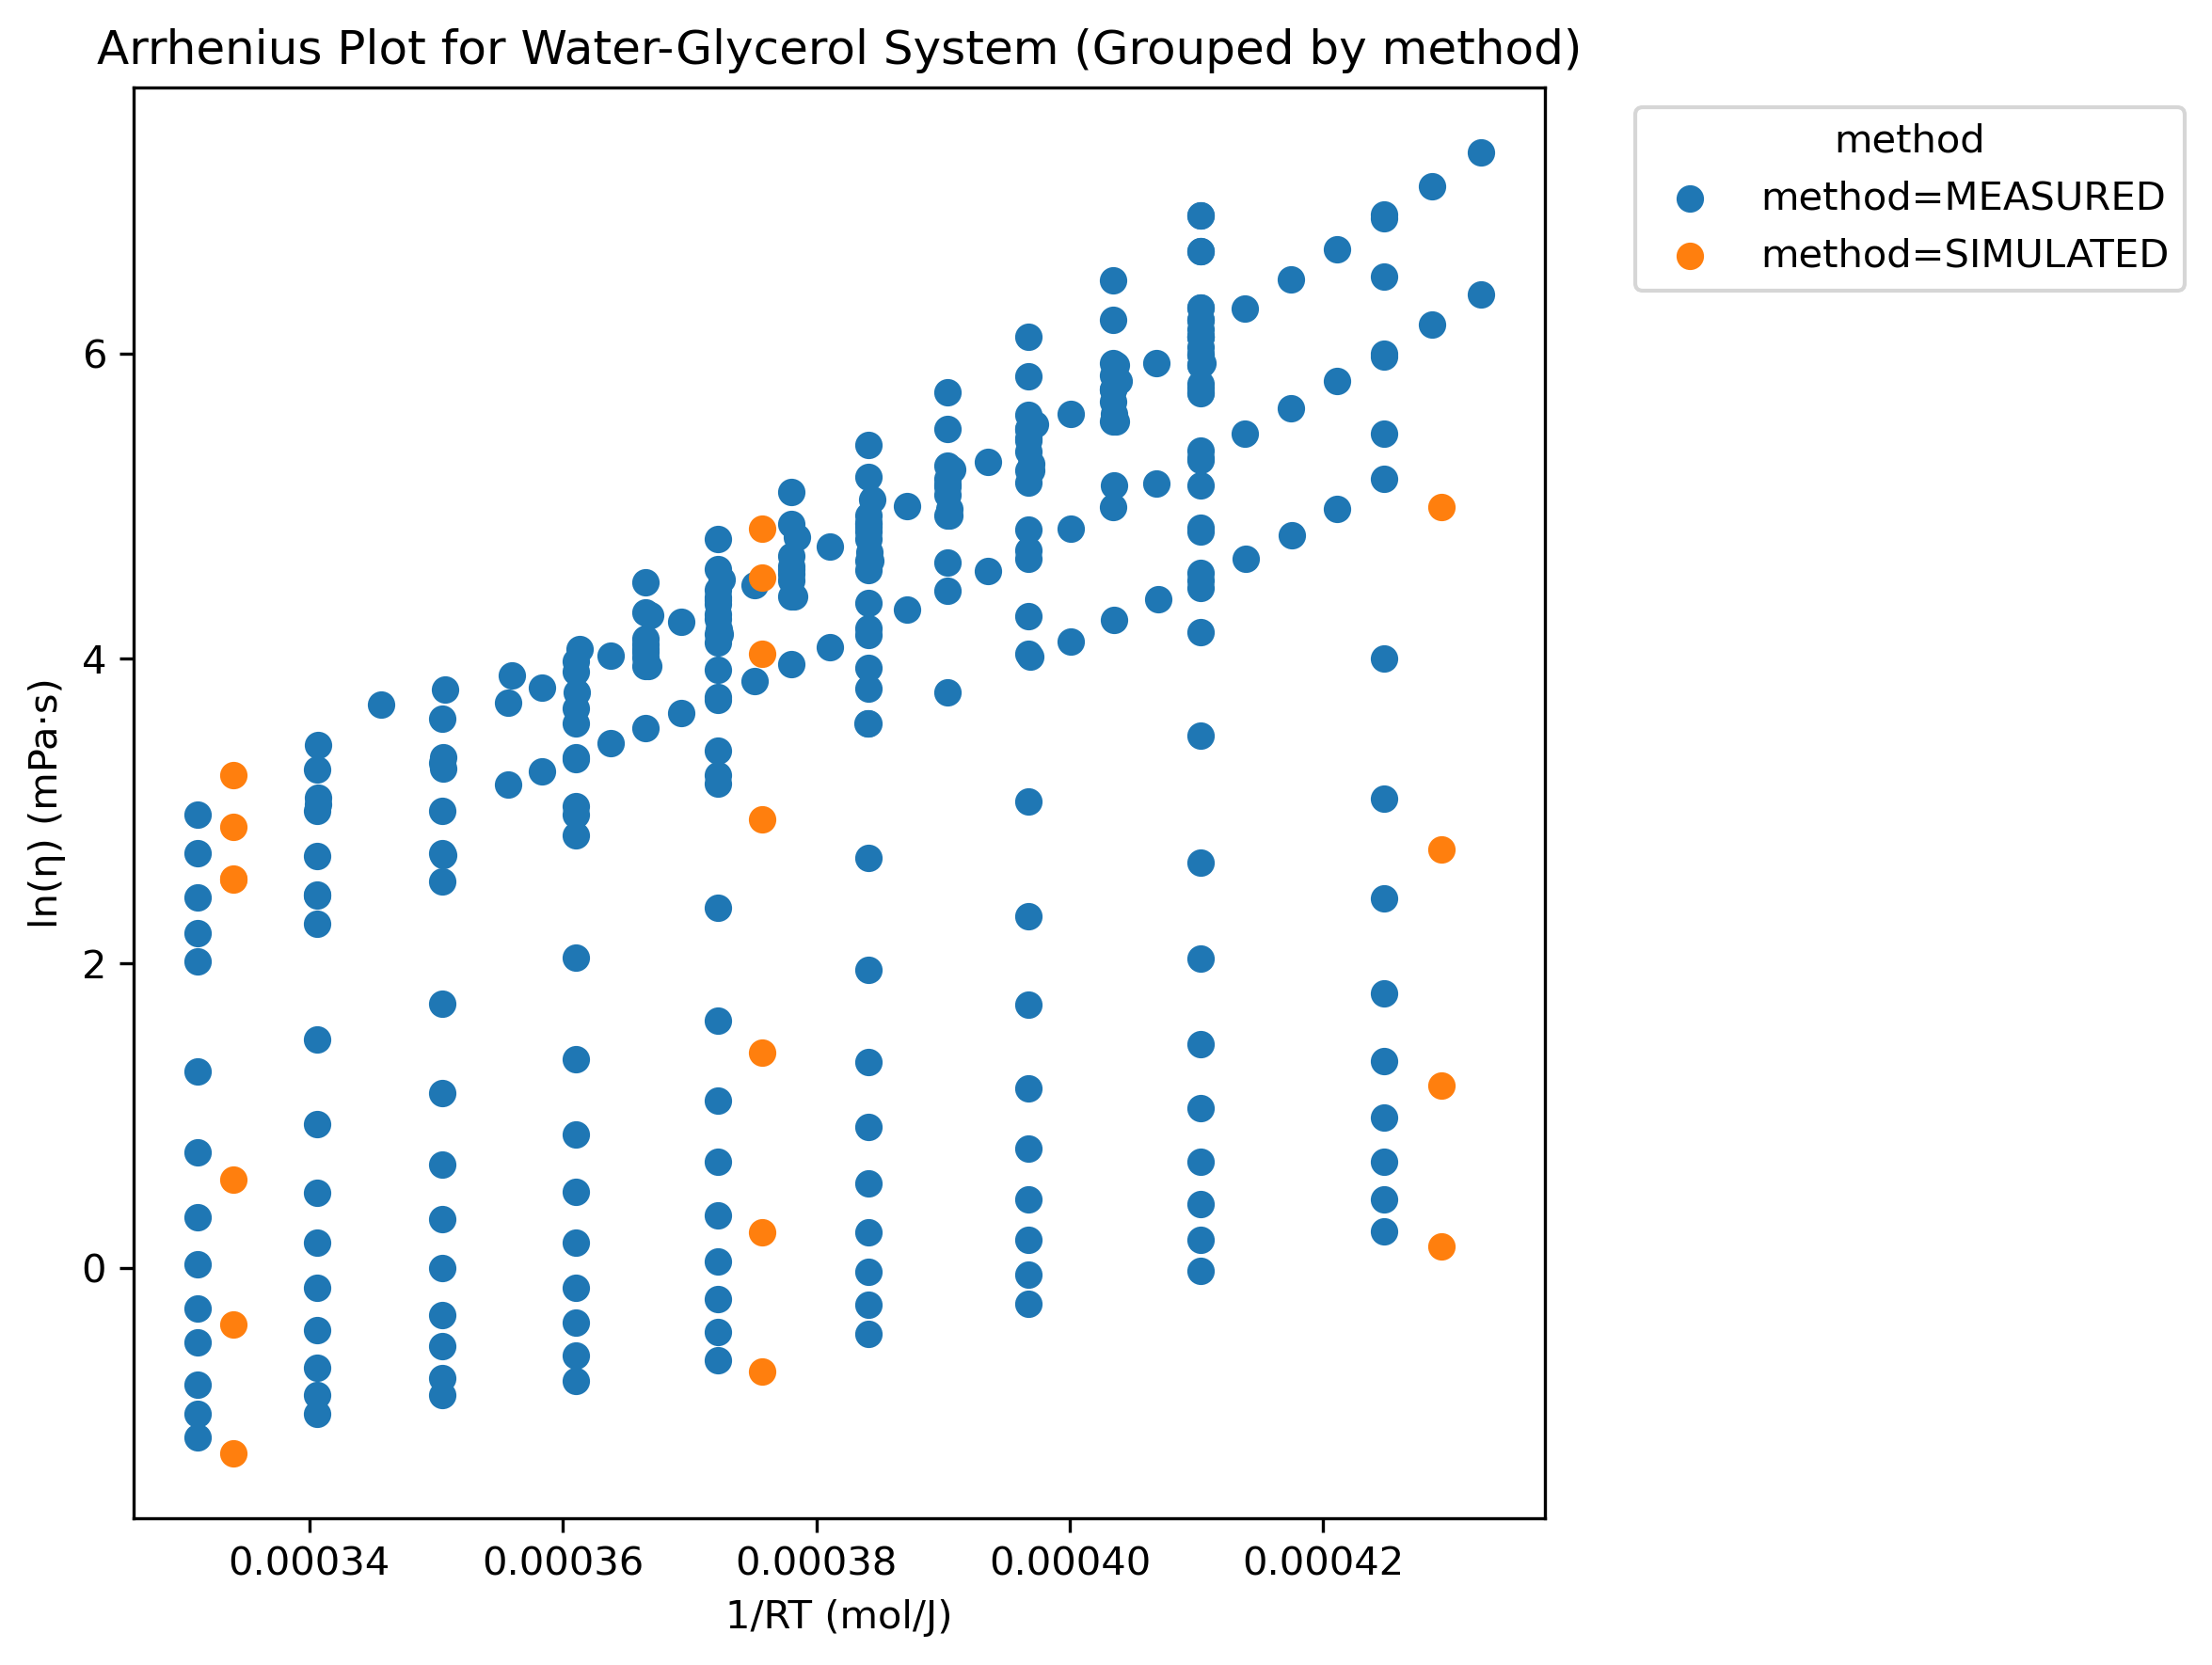


Activation Energies:
    Group  Activation Energy (kJ/mol)
 MEASURED                      44.765
SIMULATED                       9.326


In [6]:
from FAIRFluids.core.visualization import *

plot_viscosity_vs_temperature(validated_doc, group="method", fit_arrhenius=False, print_table=True)

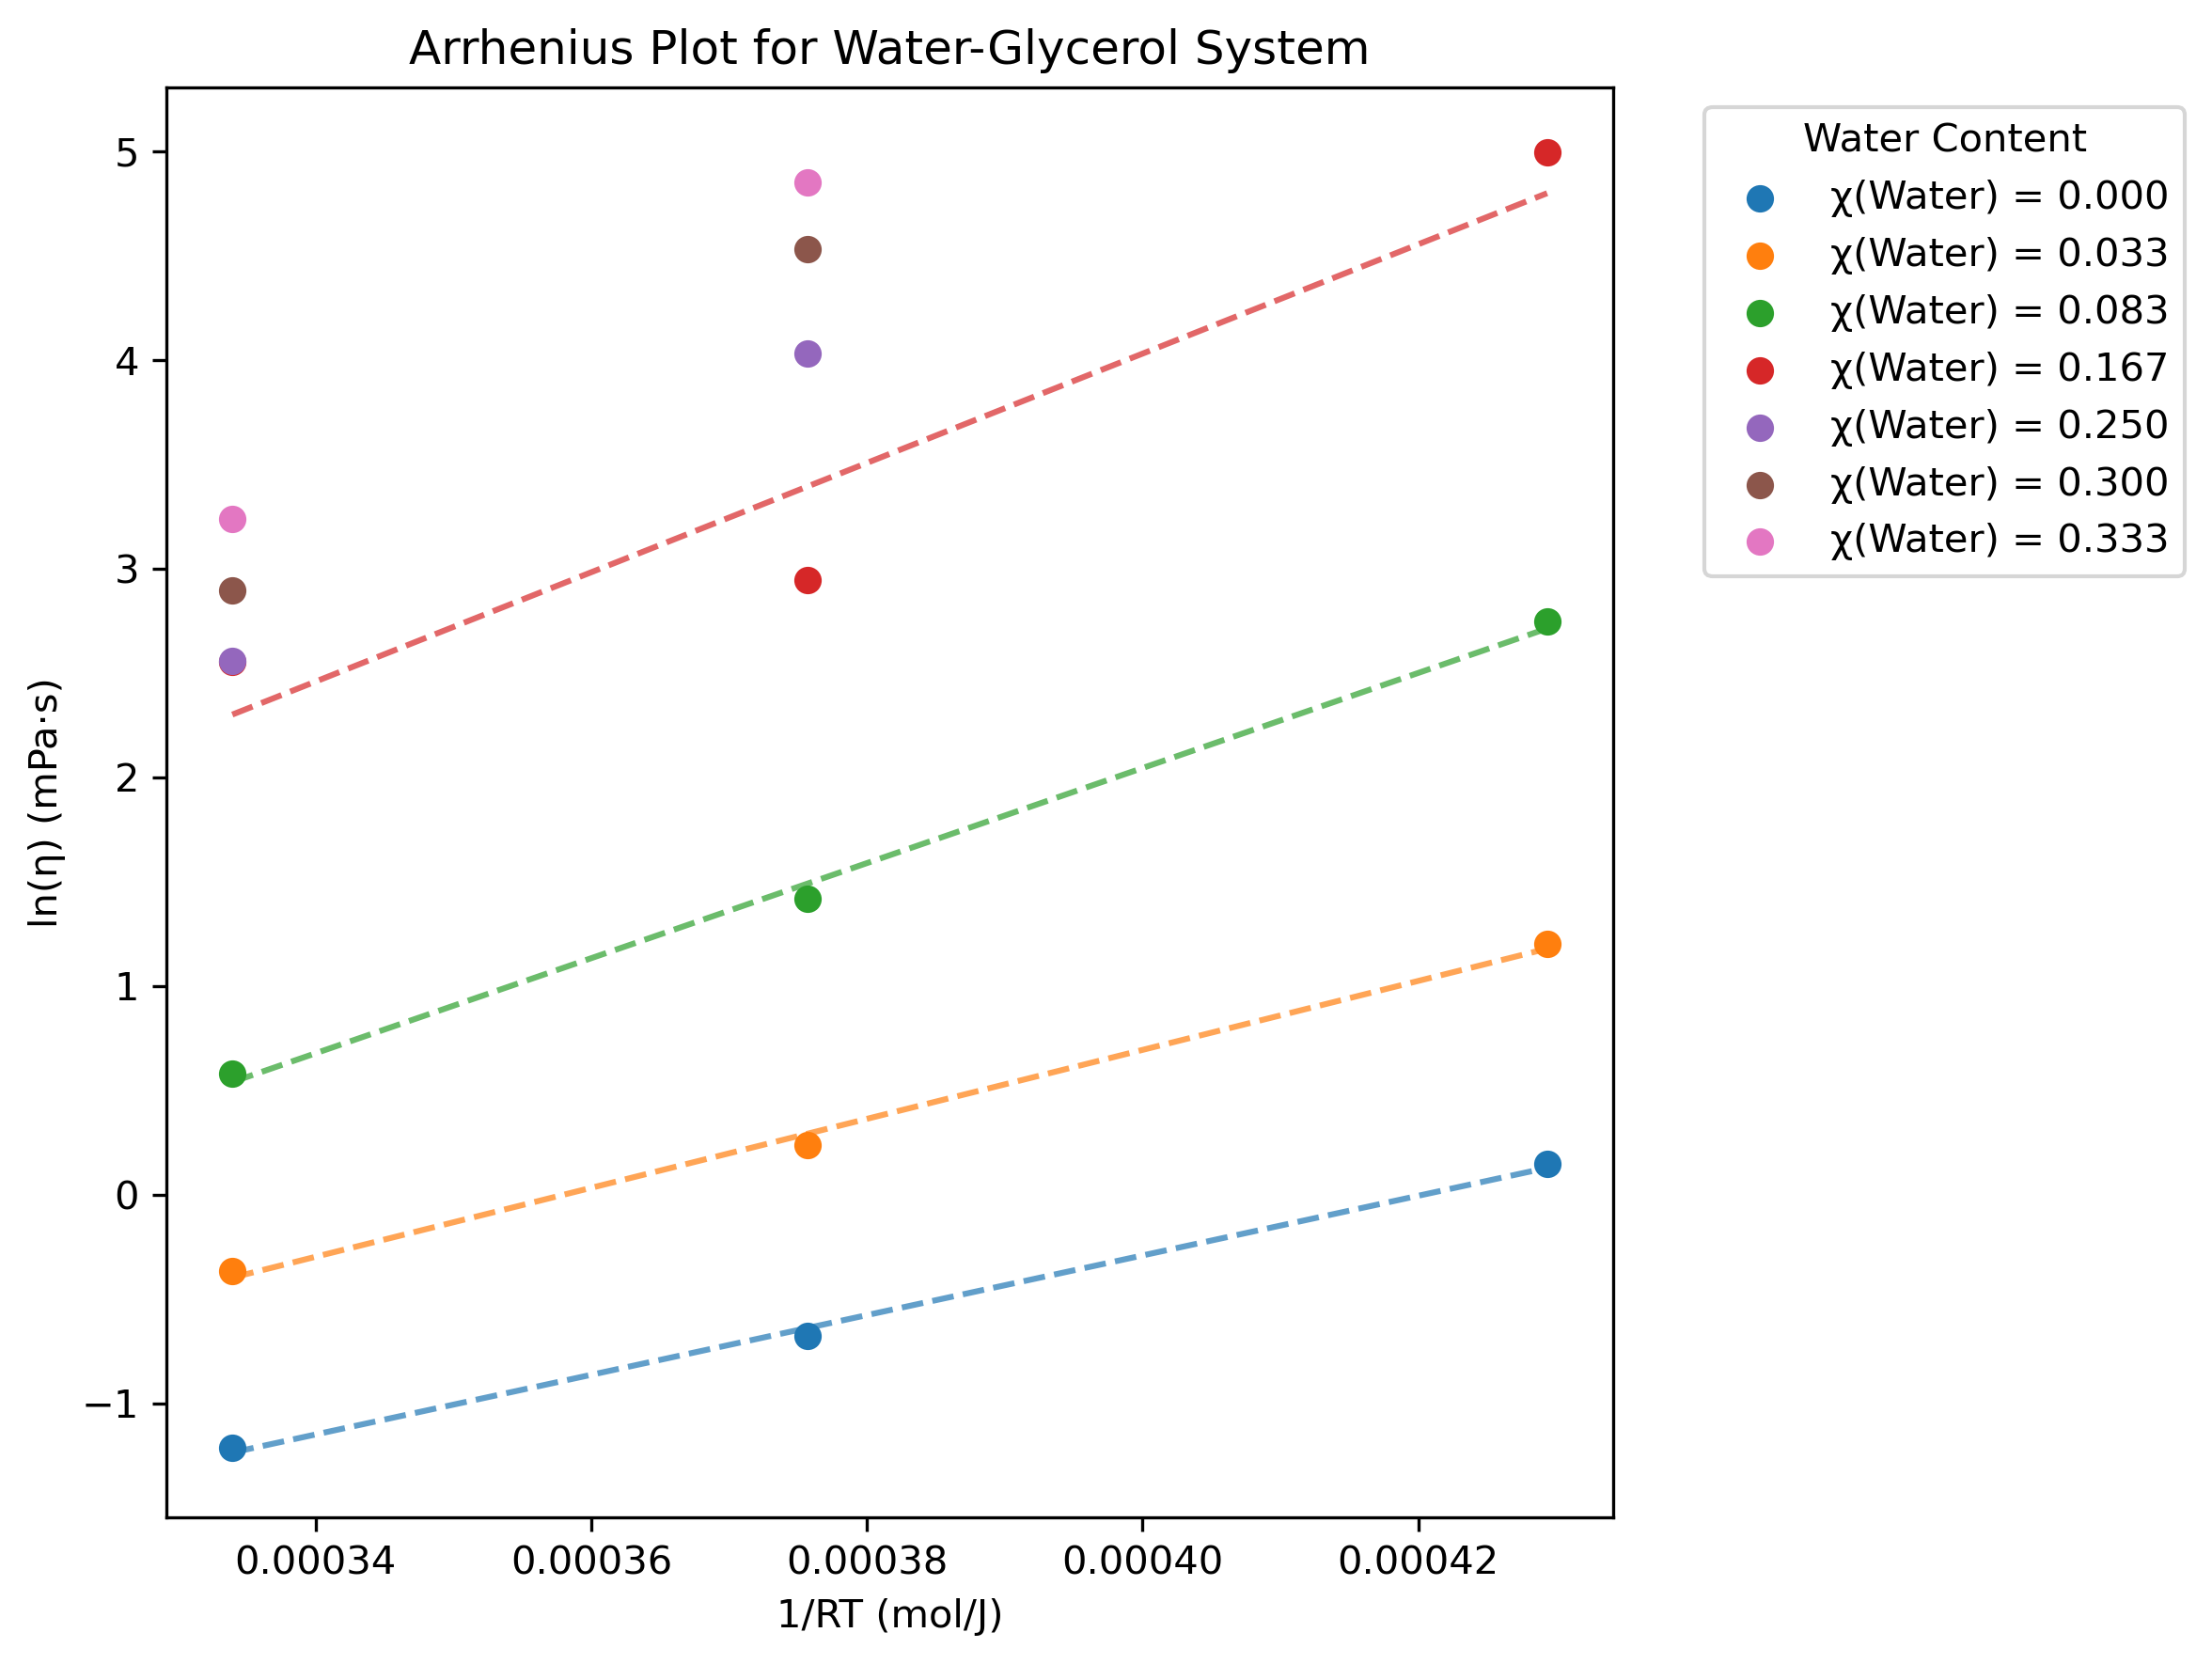


Activation Energies:
 Group  Activation Energy (kJ/mol)
 0.000                      14.304
 0.033                      16.529
 0.083                      22.789
 0.167                      26.200


In [18]:
filtered_doc = get_measurements(doc, group='Simulated')
plot_viscosity_vs_temperature(filtered_doc, component_name='Water', fit_arrhenius=True, print_table=True)

In [17]:
get_viscosity_data_with_meta(validated_doc, group="simulated")

TypeError: get_viscosity_data_with_meta() got an unexpected keyword argument 'group'

In [ ]:
calculate_activation_energies(validated_doc, "Water")
# Get activation energies and convert to kJ/mol
activation_energies = calculate_activation_energies(validated_doc, "Water")
water_fractions = list(activation_energies.keys())
E_values = [E/1000 for E in activation_energies.values()]

# Calculate ideal fluid activation energy
# Using linear combination rule: E_act = x_water * E_water + (1-x_water) * E_DES
E_water = 17.0  # Activation energy of pure water in kJ/mol
E_DES = max(E_values)  # Use highest activation energy (pure DES) as reference

# Generate smooth line for ideal behavior
x_water_ideal = np.linspace(0, 1, 100)
E_ideal = [x*E_water + (1-x)*E_DES for x in x_water_ideal]

# Add ideal line to previous plot
plt.figure(figsize=(8,7), dpi=300)
plt.scatter(water_fractions, E_values, label="Eη/Water")

plt.plot(x_water_ideal, E_ideal, 'r--', label='Ideal Mixing')
plt.xlabel('Water Mole Fraction')
plt.ylabel('Activation Energy (kJ/mol)')
plt.title('Cholinchlorid-Urea-Water')
plt.savefig('3.png', dpi=300)
plt.grid(True)
plt.legend()
plt.show()


NameError: name 'calculate_activation_energies' is not defined

In [ ]:

urea_doc = myFAIRFluidsDocument(version=Version(versionMajor=1, versionMinor=0))

# Add citation
urea_doc.citation = Citation(Type="journal")
urea_doc.citation.add_to_author(given_name="John", family_name="Doe")


# Add compounds and fluid data
urea_doc.add_to_compound(
    compound_identifier=C_id(c_id="Water"),  # Note: it's "compund_identifier" not "compound_identifier"
    pubChemID=962,
    commonName="Water",
    name_IUPAC="water", 
    standard_InChI="InChI=1S/H2O/h1H2",
    standard_InChI_key="XLYOFNOQVPJJNP-UHFFFAOYSA-N"
)


urea_doc.add_to_compound(
    compound_identifier=C_id(c_id="CholinChloride"),  # Note: it's "compund_identifier" not "compound_identifier"
    pubChemID=17789,
    commonName="CholinChloride",
    name_IUPAC="CholinChloride", 
    standard_InChI="InChI=1S/C5H11ClNO2/c1"
)

urea_doc.add_to_compound(
    compound_identifier=C_id(c_id="Urea"),  # Note: it's "compund_identifier" not "compound_identifier"
    pubChemID=1128,
    commonName="Glycerol",
    name_IUPAC="glycerol",
    standard_InChI="InChI=1S/C3H8O3/c1-2-3-4/h2-3H,1H3",
    standard_InChI_key="XLYOFNOQVPJJNP-UHFFFAOYSA-N"
)





urea_doc.get_data_from_cml("data/cml_xml/ChCl_urea.xml")
print(f"Sum of all numerical property values: {urea_doc.sum_num_values()}")

# Save model to JSON file
with open('ChCl_urea_model.json', 'w') as f:
    f.write(urea_doc.model_dump_json(indent=2))

Sum of all numerical property values: 12331.6081374


In [ ]:
# Load JSON and validate with model
with open('ChCl_urea_model.json', 'r') as f:
    json_data = f.read()
    
# Create new document from JSON and validate
chcl_urea_doc = myFAIRFluidsDocument.model_validate_json(json_data)


chcl_urea_doc.get_viscosity_data()

[{'temperature': 313.15,
  'mole_fractions': [0.0, 0.3333333333333333, 0.6666666666666667],
  'compound_identifiers': ['Water', 'CholinChloride', 'Urea'],
  'viscosity': 169.0},
 {'temperature': 318.026111,
  'mole_fractions': [0.0, 0.3333333333333333, 0.6666666666666667],
  'compound_identifiers': ['Water', 'CholinChloride', 'Urea'],
  'viscosity': 122.103044},
 {'temperature': 315.555369,
  'mole_fractions': [0.0, 0.3333333333333333, 0.6666666666666667],
  'compound_identifiers': ['Water', 'CholinChloride', 'Urea'],
  'viscosity': 144.945703},
 {'temperature': 313.07244,
  'mole_fractions': [0.0, 0.3333333333333333, 0.6666666666666667],
  'compound_identifiers': ['Water', 'CholinChloride', 'Urea'],
  'viscosity': 172.061696},
 {'temperature': 310.529327,
  'mole_fractions': [0.0, 0.3333333333333333, 0.6666666666666667],
  'compound_identifiers': ['Water', 'CholinChloride', 'Urea'],
  'viscosity': 204.250466},
 {'temperature': 308.075872,
  'mole_fractions': [0.0, 0.3333333333333333, 

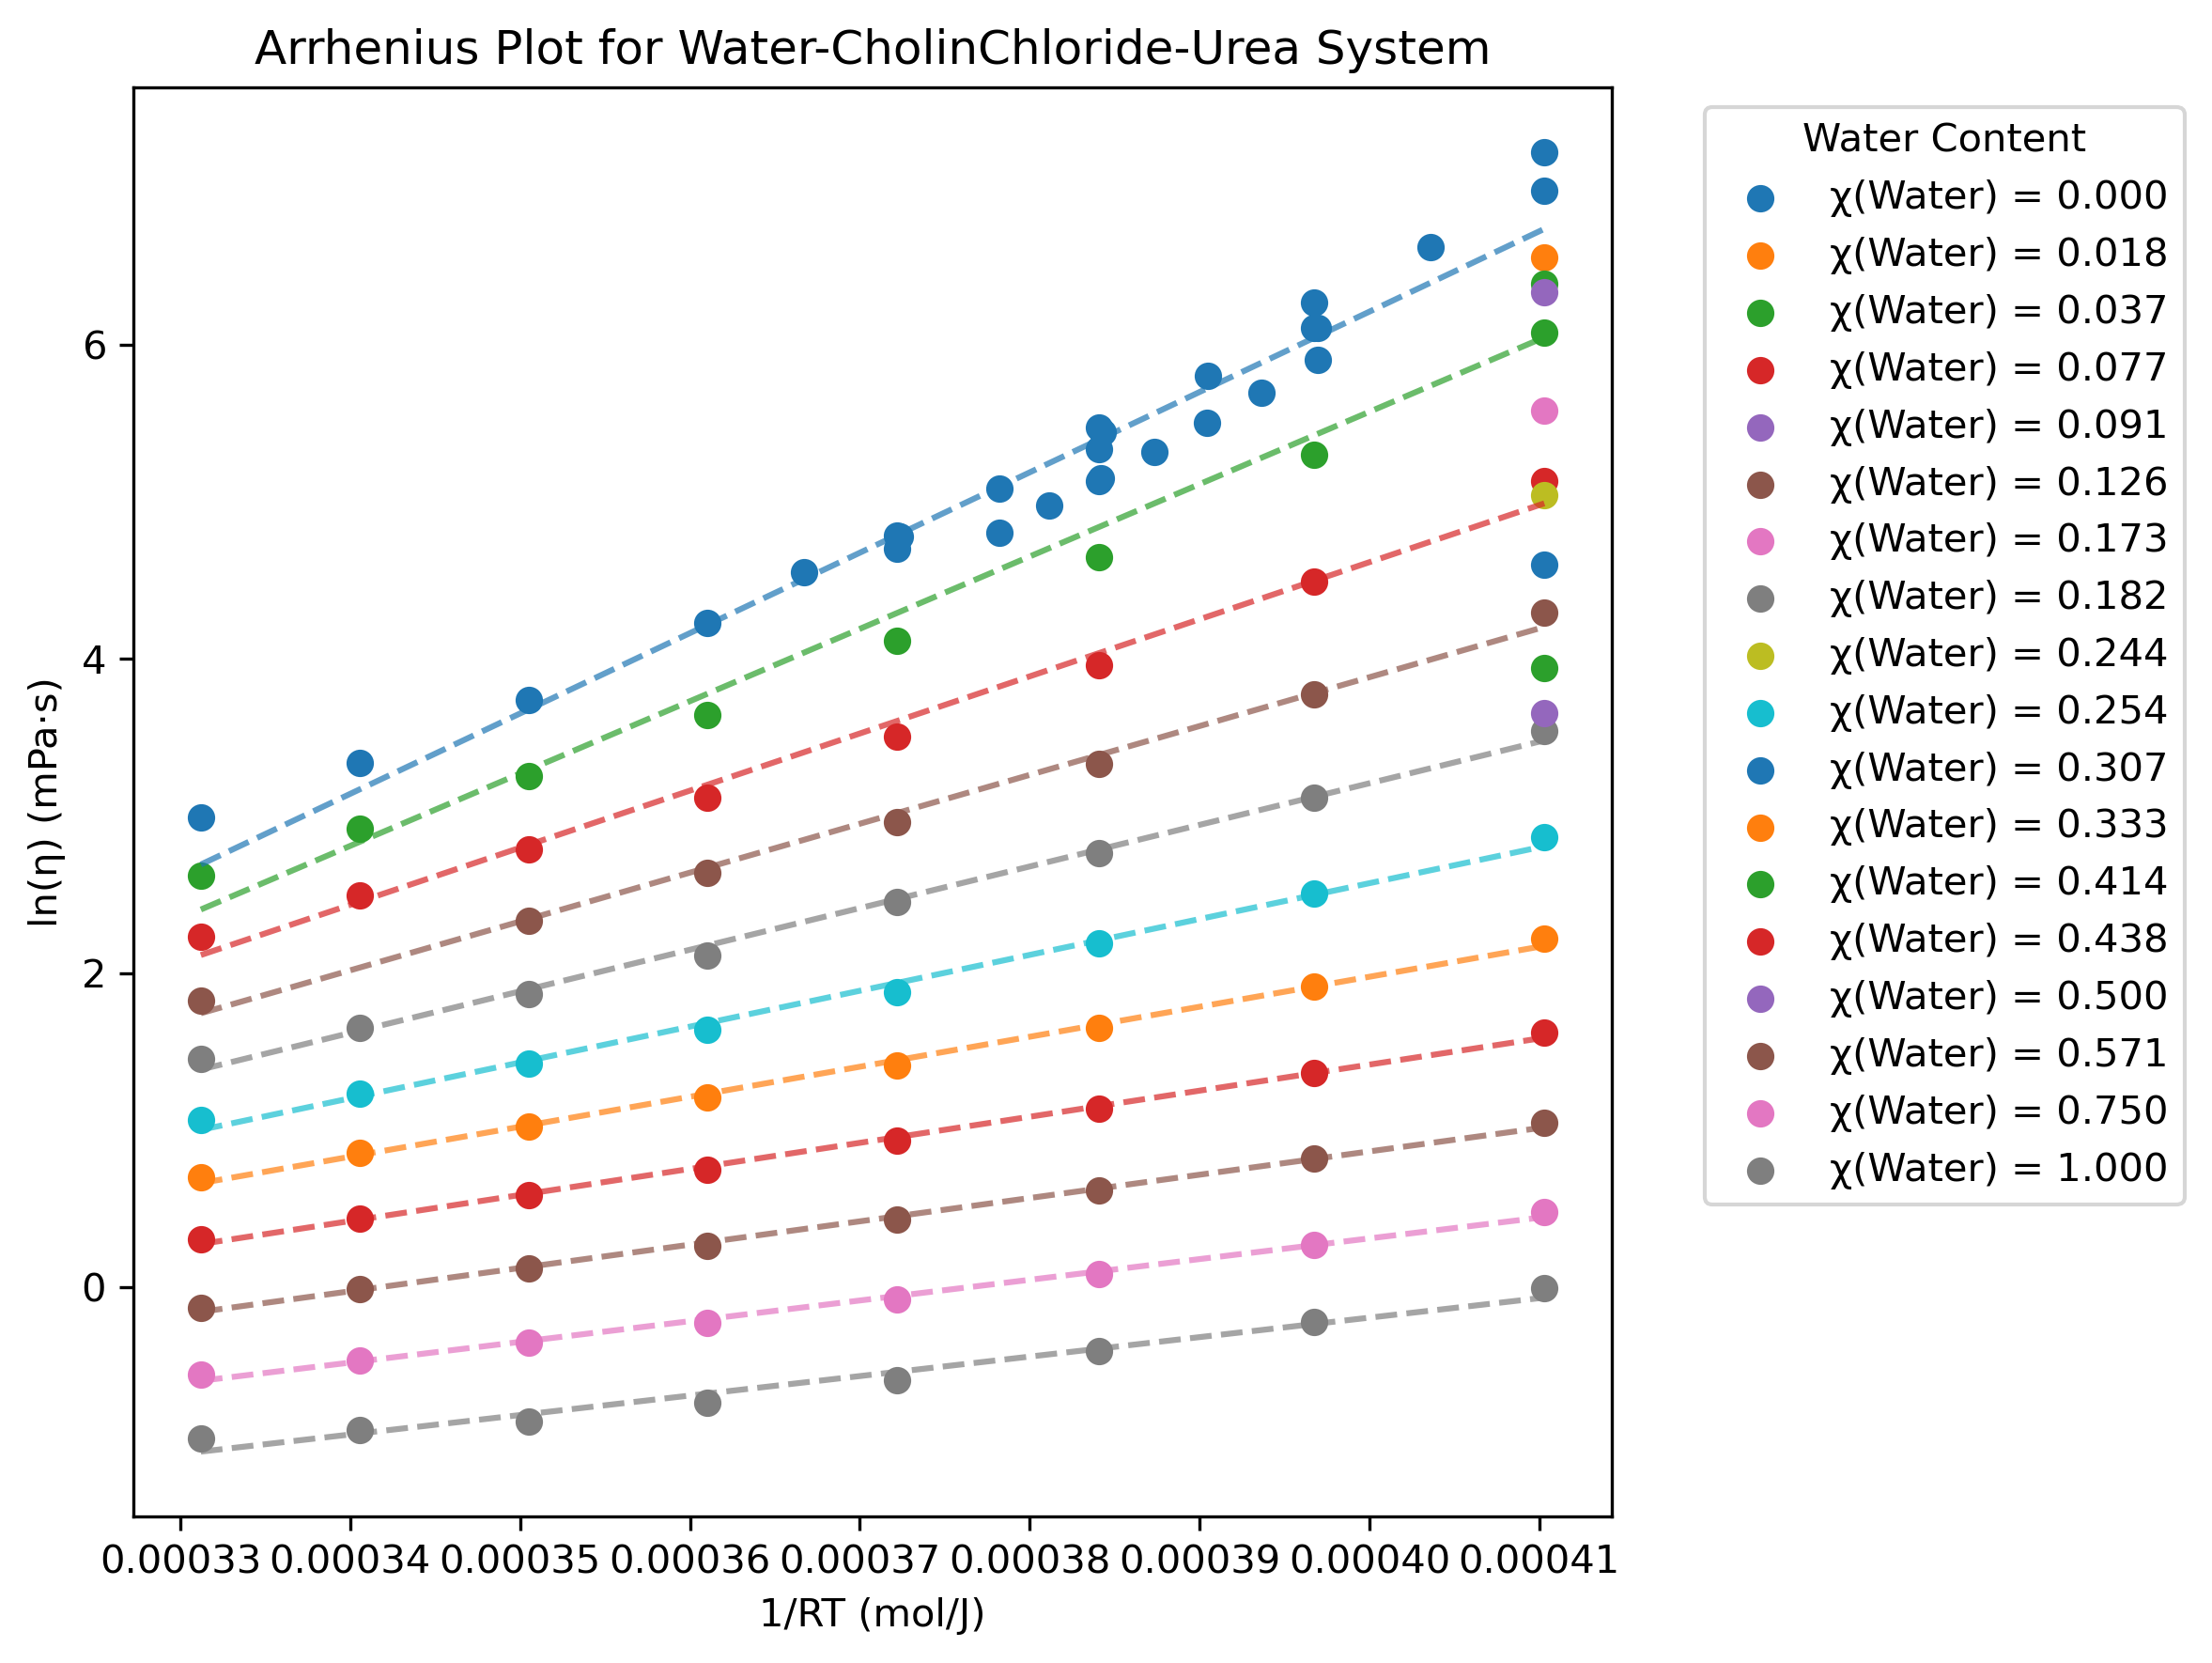


Activation Energies:
 Mole Fraction  Activation Energy (kJ/mol)
         0.000                      51.154
         0.037                      46.051
         0.077                      36.353
         0.126                      31.094
         0.182                      26.490
         0.254                      22.824
         0.333                      19.092
         0.438                      16.600
         0.571                      14.839
         0.750                      13.175
         1.000                      12.396


In [ ]:
plot_viscosity_vs_temperature(chcl_urea_doc, "Water", fit_arrhenius=True, print_table=True)
